In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import os 

# Load signals
signals = pd.read_csv('../data/engineered_signals.csv', parse_dates=['Date'])
signals.set_index('Date', inplace=True)

# Resample to quarterly (mean of each quarter)
signals_q = signals.resample('Q').mean()

# Simulate quarterly revenue (replace with real tata_motors_financials.csv if available)
np.random.seed(42)
revenue = pd.DataFrame(index=signals_q.index)
revenue['Revenue'] = 10000 + np.random.normal(0, 300, len(revenue)) + (signals_q['Auto_YoY'].fillna(0) * 500)

# Merge signals + target
dataset = pd.concat([signals_q, revenue], axis=1).dropna()
print(dataset.head())


            Auto_YoY  CPI_Repo_Spread       Revenue
Date                                               
2023-03-31  0.121303        -0.437500  10209.665524
2023-06-30 -0.019977        -0.618333   9948.531961
2023-09-30 -0.032164         0.470000  10178.224438
2023-12-31  0.187126         0.028571  10550.471854
2024-03-31  0.065888        -0.255000   9962.697951


/var/folders/vq/67rg32y9779bptdgz21w4ql80000gn/T/ipykernel_33407/1778387549.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  signals_q = signals.resample('Q').mean()


R² (out-of-sample): -0.550
RMSE: 304.16


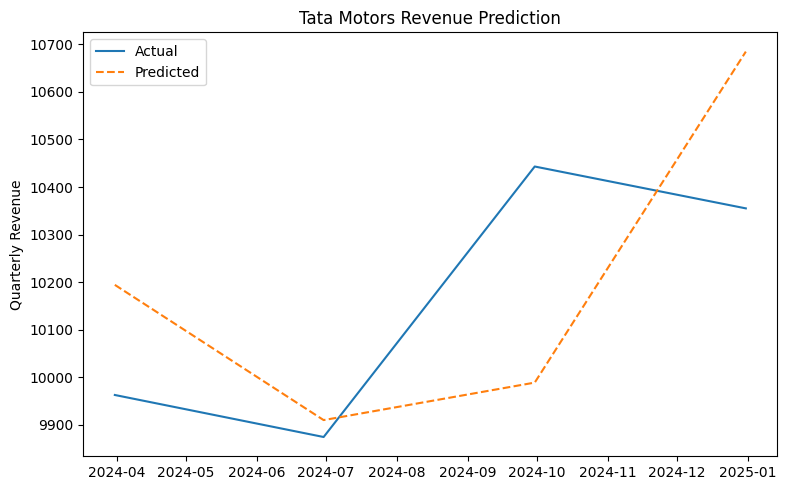

In [11]:
# Split into train/test
train = dataset[:-4]
test = dataset[-4:]

X_train, y_train = train.drop(columns='Revenue'), train['Revenue']
X_test, y_test = test.drop(columns='Revenue'), test['Revenue']

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
preds = model.predict(X_test)
r2 = r2_score(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f"R² (out-of-sample): {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

# Plot predictions vs actual
plt.figure(figsize=(8, 5))
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, preds, label='Predicted', linestyle='--')
plt.title("Tata Motors Revenue Prediction")
plt.ylabel("Quarterly Revenue")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, preds, label='Predicted')
plt.legend()
plt.title('Quarterly Revenue Prediction')
plt.tight_layout()
plt.savefig('../outputs/revenue_prediction_plot.png')
plt.close()
test.to_csv('../outputs/model_predictions.csv')